<img src="http://bigdataexperience.org/BX/wp-content/uploads/2016/05/BX-FULL.png" width="200" height="200" alt="Big Data Experience Center, King Mongkut's University of Technology Thonburi">

# <center>CPE352 Data Science</center>
# <center>Lecture 7 - Machine Learning - Classification</center>
---

# Lab - Heart Disease

## Task
Build ML model to classify patients with heart disease.
## Due Date
19 October 2020
Submit the PDF file of this notebook to LEB2
## Data
Data is in the file "heart.csv"
### Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "target" field refers to the presence of heart disease in the patient, 0 for not present and 1 for present.

### Content

Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 0 for normal, 1 for heart disease

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

Reference: https://www.kaggle.com/ronitf/heart-disease-uci

## Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

heartdata = pd.read_csv('heart.csv')
heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis

In [2]:
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
heartdata.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heartdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Data: Correlations between Variables')

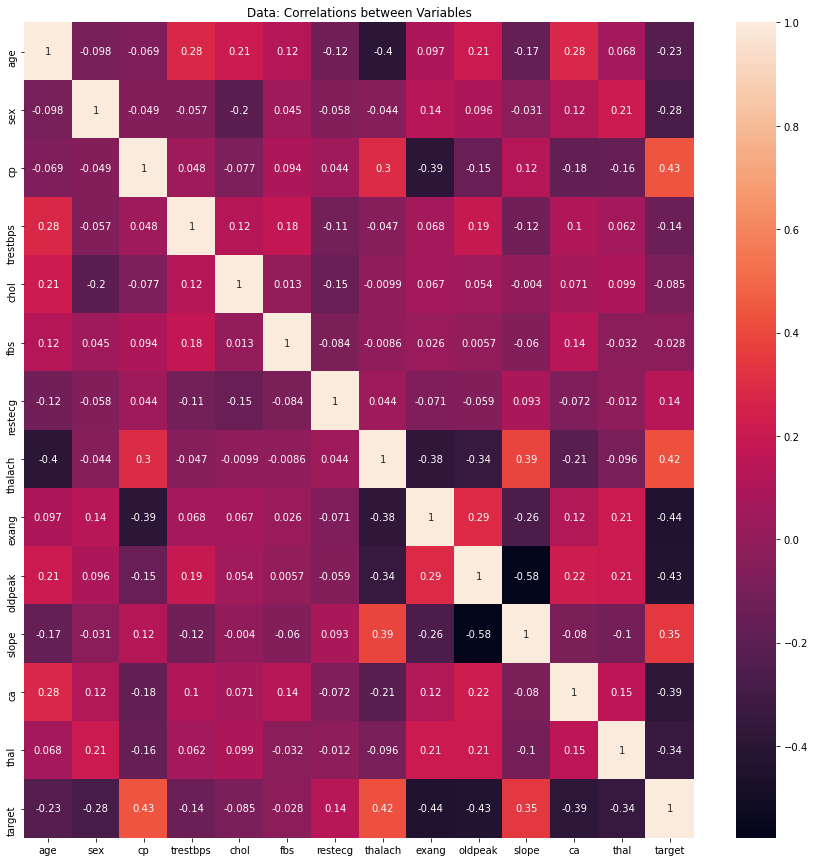

In [7]:
corr_matrix = heartdata.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, square=False, fmt=".2g")
plt.title("Data: Correlations between Variables")

## Data preparation

1. Transform categorical variable 
2. Concatenate with numerical data

In [8]:
heartdata_cat = heartdata[['sex','cp','fbs','restecg','exang','thal']].applymap(str)
heartdata_num = heartdata.drop(columns=heartdata_cat)
heartdata_dum = pd.get_dummies(heartdata_cat,drop_first=True)
heartdata_prepa = pd.concat([heartdata_dum,heartdata_num],axis=1)
heartdata_prepa

,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,thal_1,thal_2,thal_3,age,trestbps,chol,thalach,oldpeak,slope,ca,target
0,1,0,0,1,1,0,0,0,1,0,0,63,145,233,150,2.3,0,0,1
1,1,0,1,0,0,1,0,0,0,1,0,37,130,250,187,3.5,0,0,1
2,0,1,0,0,0,0,0,0,0,1,0,41,130,204,172,1.4,2,0,1
3,1,1,0,0,0,1,0,0,0,1,0,56,120,236,178,0.8,2,0,1
4,0,0,0,0,0,1,0,1,0,1,0,57,120,354,163,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,0,0,1,0,1,0,0,1,57,140,241,123,0.2,1,0,0
299,1,0,0,1,0,1,0,0,0,0,1,45,110,264,132,1.2,1,0,0
300,1,0,0,0,1,1,0,0,0,0,1,68,144,193,141,3.4,1,2,0
301,1,0,0,0,0,1,0,1,0,0,1,57,130,131,115,1.2,1,1,0


## Sample  data into 2 sets: 70%, 30%

In [9]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(heartdata_prepa,test_size=0.3)

## Check distribution

In [10]:
pd.crosstab(train['target'],columns='prob',normalize=True)

col_0,prob
target,
0,0.462264
1,0.537736


In [11]:
pd.crosstab(test['target'],columns='prob',normalize=True)

col_0,prob
target,
0,0.43956
1,0.56044


## Decision tree model

In [12]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(min_samples_leaf=10)
tree.fit(train.drop(columns='target'),train['target'])

DecisionTreeClassifier(min_samples_leaf=10)

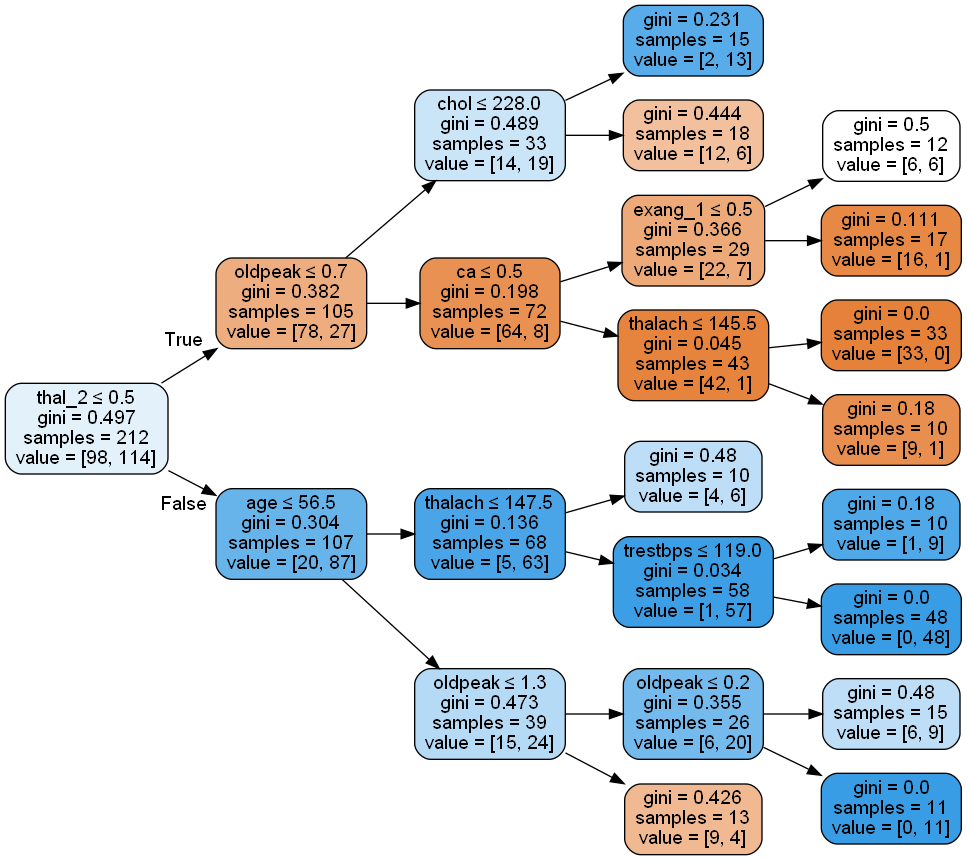

In [13]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                rotate=True,
                feature_names=train.columns[:-1])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('tree.png')
Image(graph.create_png())

In [14]:
pd.DataFrame(dict(Feature=train.columns[:-1],
                  Value=tree.feature_importances_))\
    .sort_values(by='Value', ascending=False)

,Feature,Value
9,thal_2,0.504687
15,oldpeak,0.238703
11,age,0.073906
13,chol,0.071709
7,exang_1,0.042187
14,thalach,0.040868
17,ca,0.025390
12,trestbps,0.002550
6,restecg_2,0.000000
8,thal_1,0.000000


### Prediction and Evaluation of decision tree model

In [16]:
from sklearn.metrics import classification_report

res = tree.predict(test.drop(columns='target'))
print(classification_report(y_true=test['target'].values, y_pred=res))

              precision    recall  f1-score   support

           0       0.71      0.62      0.67        40
           1       0.73      0.80      0.77        51

    accuracy                           0.73        91
   macro avg       0.72      0.71      0.72        91
weighted avg       0.72      0.73      0.72        91



## LDA model

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(train.drop(columns='target'), train['target'])

LinearDiscriminantAnalysis()

In [18]:
pd.DataFrame(dict(Feature = train.columns[:-1],
                  Coefficient = lda.coef_[0]))

,Feature,Coefficient
0,sex_1,-0.830848
1,cp_1,1.183727
2,cp_2,1.391975
3,cp_3,1.136438
4,fbs_1,0.605741
5,restecg_1,0.154713
6,restecg_2,0.335079
7,exang_1,-0.885294
8,thal_1,0.577080
9,thal_2,1.077603


### Prediction and Evaluation of LDA model

In [19]:
res_lda = lda.predict(test.drop(columns='target'))
print(classification_report(y_true=test['target'].values, y_pred=res_lda))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        40
           1       0.80      0.94      0.86        51

    accuracy                           0.84        91
   macro avg       0.85      0.82      0.83        91
weighted avg       0.85      0.84      0.83        91



## Logistic regression model

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train.drop(columns='target'), train['target'])

C:\Users\win10x64\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
pd.DataFrame(dict(Feature = train.columns[:-1],
                  Coefficient = lr.coef_[0]))

,Feature,Coefficient
0,sex_1,-0.524865
1,cp_1,0.257053
2,cp_2,0.675199
3,cp_3,0.263519
4,fbs_1,0.268976
5,restecg_1,0.116702
6,restecg_2,0.025864
7,exang_1,-0.733079
8,thal_1,0.201314
9,thal_2,0.774192


### Prediction and Evaluation of Logistic regression model

In [22]:
res_lr = lr.predict(test.drop(columns='target'))
print(classification_report(y_true=test['target'].values, y_pred=res_lr))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77        40
           1       0.79      0.90      0.84        51

    accuracy                           0.81        91
   macro avg       0.82      0.80      0.81        91
weighted avg       0.82      0.81      0.81        91



### Summary

From building 3 models , the best model to classify patients with heart disease is LDA.